In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
wine = 'wineData.txt'

In [3]:
with open(wine, 'r', encoding='latin-1') as archivo:
    lineas = archivo.readlines()
datos = [linea.strip().split(',') for linea in lineas]
columnas = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df = pd.DataFrame(datos, columns=columnas)

In [4]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050
2,1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480
4,1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,.61,.52,1.06,7.7,.64,1.74,740
174,3,13.4,3.91,2.48,23,102,1.8,.75,.43,1.41,7.3,.7,1.56,750
175,3,13.27,4.28,2.26,20,120,1.59,.69,.43,1.35,10.2,.59,1.56,835
176,3,13.17,2.59,2.37,20,120,1.65,.68,.53,1.46,9.3,.6,1.62,840


Estos datos son los resultados de un análisis químico de vinos cultivados en la misma región de Italia pero procedentes de tres cultivares diferentes (mostrado en la columna Class).

Por suerte, revisando los datos podemos estar seguros que no existen strings, pues todas las columnas son medidas de algún tipo. Todas exceptos la clase de vino, pero eso es lo que vamos a medir así que esta bien.

In [5]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178,178,178,178,178,178,178,178,178,178,178,178,178,178
unique,3,126,133,79,63,53,97,132,39,101,132,78,122,121
top,2,13.05,1.73,2.3,20,88,2.2,2.65,.43,1.35,2.6,1.04,2.87,680
freq,71,6,7,7,15,13,8,4,11,9,4,8,5,5


In [8]:
df.dtypes

Class                           object
Alcohol                         object
Malic acid                      object
Ash                             object
Alcalinity of ash               object
Magnesium                       object
Total phenols                   object
Flavanoids                      object
Nonflavanoid phenols            object
Proanthocyanins                 object
Color intensity                 object
Hue                             object
OD280/OD315 of diluted wines    object
Proline                         object
dtype: object

Como el modelo solo interpreta números tendremos que convertir nuestras variables en float.

In [9]:
for columna in columnas:
    df[columna] = df[columna].astype('float64')

In [10]:
df.dtypes

Class                           float64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                       float64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                         float64
dtype: object

In [11]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [13]:
x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [14]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
173    3.0
174    3.0
175    3.0
176    3.0
177    3.0
Name: Class, Length: 178, dtype: float64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [16]:
x_train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,11.65,1.67,2.62,26.0,88.0,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
129,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


In [17]:
x_test

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0
81,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714.0
157,12.45,3.03,2.64,27.0,97.0,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880.0
26,13.39,1.77,2.62,16.1,93.0,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195.0
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
76,13.03,0.90,1.71,16.0,86.0,1.95,2.03,0.24,1.46,4.60,1.19,2.48,392.0


In [18]:
y_train

16     1.0
19     1.0
2      1.0
159    3.0
135    3.0
      ... 
87     2.0
104    2.0
129    2.0
174    3.0
122    2.0
Name: Class, Length: 142, dtype: float64

In [19]:
y_test

163    3.0
142    3.0
14     1.0
45     1.0
81     2.0
157    3.0
26     1.0
74     2.0
1      1.0
76     2.0
90     2.0
18     1.0
170    3.0
166    3.0
33     1.0
105    2.0
48     1.0
102    2.0
93     2.0
156    3.0
91     2.0
165    3.0
124    2.0
168    3.0
6      1.0
134    3.0
69     2.0
92     2.0
143    3.0
144    3.0
47     1.0
77     2.0
12     1.0
113    2.0
167    3.0
140    3.0
Name: Class, dtype: float64

---

# Ejercicio 1
Crea por lo menos dos modelos de clasificación diferentes para intentar predecir lo mejor las clases del archivo adjunto.

---
-Regresión logística

-SVM

In [20]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [21]:
logreg = LogisticRegression(random_state=16)

In [22]:
clf = svm.SVC()

In [23]:
logreg.fit(x_train, y_train)

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [24]:
clf.fit(x_train, y_train)

SVC()

In [25]:
pre_log = logreg.predict(x_test)
pre_clf = clf.predict(x_test)

In [26]:
pre_log

array([3., 2., 1., 1., 2., 3., 1., 1., 1., 2., 2., 1., 3., 3., 1., 2., 1.,
       2., 2., 3., 2., 3., 2., 3., 1., 3., 2., 2., 3., 3., 1., 2., 1., 2.,
       3., 3.])

In [27]:
pre_clf

array([2., 2., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 2., 2., 1., 2., 1.,
       2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 1., 2.,
       2., 2.])

Ya tenemos nuestros modelos entrenados, y estas son sus predicciones con los datos de x_test.

Y aunque podriamos compararlos con los datos reales para conocer que tan eficientes son, hay una manera más sencilla.

---
# Ejercicio 2
Compara los modelos de clasificación utilizando la precisión (accuracy), una matriz de confusión y otras métricas más avanzadas.

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [29]:
print('Regresión Logistica', accuracy_score(y_test, pre_log))

Regresión Logistica 0.9444444444444444


In [30]:
score_log = accuracy_score(y_test, pre_log)

In [31]:
print('SMV', accuracy_score(y_test, pre_clf))

SMV 0.6111111111111112


In [32]:
score_clf = accuracy_score(y_test, pre_clf)

La métrica accuracy representa el porcentaje total de valores correctamente clasificados, tanto positivos como negativos. Es decir, la regresión logistica optuvo un 94% de aciertos, mientras que SMV un 61%. Esta claro cual es mejor, pero vamos a hacer más pruebas.

In [33]:
Pruebas = [('Precisión', precision_score), ('Recall', recall_score), ('F1', f1_score)]


In [34]:
for metrica, formula in Pruebas:
    print(metrica, '\n', 'Regresión Logistica', formula(y_test, pre_log, average='macro'), '\n', 'SMV', formula(y_test, pre_clf, average='macro'), '\n')

Precisión 
 Regresión Logistica 0.9440559440559441 
 SMV 0.4303232998885173 

Recall 
 Regresión Logistica 0.9487179487179488 
 SMV 0.6410256410256411 

F1 
 Regresión Logistica 0.9451526251526251 
 SMV 0.5120772946859904 



D:\users\ciberintegra_14\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


D:\users\ciberintegra_14\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


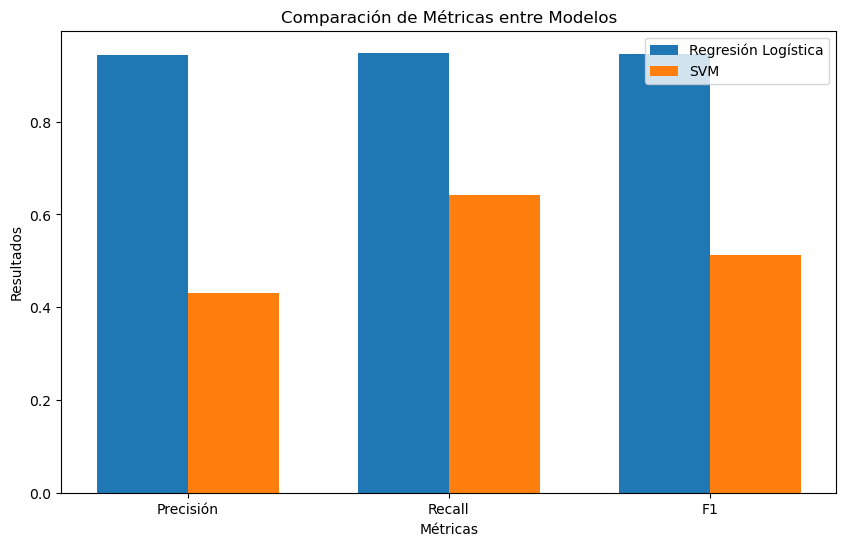

In [84]:
metricas = ['Precisión', 'Recall', 'F1']
resultados_log = [precision_score(y_test, pre_log, average='macro'),
                  recall_score(y_test, pre_log, average='macro'),
                  f1_score(y_test, pre_log, average='macro')]

resultados_svm = [precision_score(y_test, pre_clf, average='macro'),
                  recall_score(y_test, pre_clf, average='macro'),
                  f1_score(y_test, pre_clf, average='macro')]

bar_width = 0.35
index = np.arange(len(metricas))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, resultados_log, bar_width, label='Regresión Logística')
bar2 = ax.bar(index + bar_width, resultados_svm, bar_width, label='SVM')

ax.set_xlabel('Métricas')
ax.set_ylabel('Resultados')
ax.set_title('Comparación de Métricas entre Modelos')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metricas)
ax.legend()

La métrica de precisión es utilizada para poder saber qué porcentaje de valores que se han clasificado como positivos son realmente positivos.

La métrica de recall, también conocida como el ratio de verdaderos positivos, es utilizada para saber cuantos valores positivos son correctamente clasificados.

Esta es una métrica muy utilizada en problemas en los que el conjunto de datos a analizar está desbalanceado. Esta métrica combina el precision y el recall, para obtener un valor mucho más objetivo.

---

Observando los datos, podemos llegar a conclusiones bastante similares a los de accurecy, lo más notable es que SMV tiene un F1 a la mitad, es decir, el modelo es bastante malo.

In [35]:
cm_log = confusion_matrix(y_test, pre_log)

In [36]:
cm_clf = confusion_matrix(y_test, pre_clf)

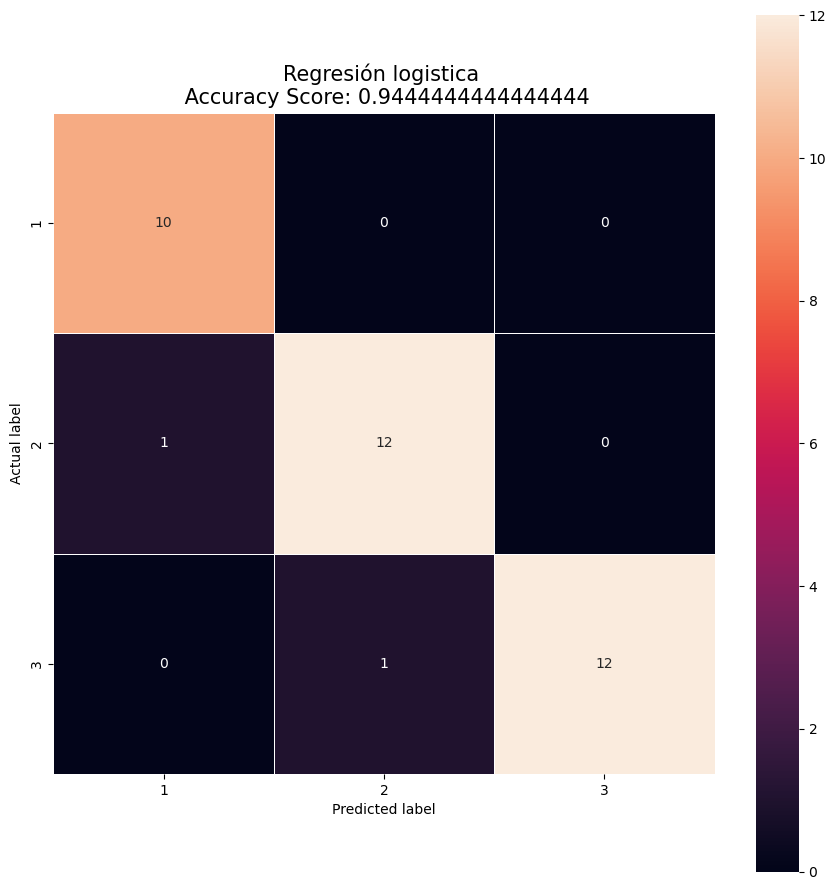

In [37]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm_log, annot=True, linewidths=.5, square=True);

plt.xticks(ticks=[i + 0.5 for i in range(cm_log.shape[1])], labels=range(1, cm_log.shape[1] + 1), ha='center')

plt.yticks(ticks=[i + 0.5 for i in range(cm_log.shape[0])], labels=range(1, cm_log.shape[0] + 1), va='center')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Regresión logistica \n Accuracy Score: {0}'.format(score_log)
plt.title(all_sample_title, size=15)

plt.tight_layout()

plt.show()

Visto en el heatmap, vemos un resumen más claro de lo que esta pasando.

Si el los números de ambas orientaciones coinciden entonces el valor predecido fue correcto. Y los colores que se muestran ayudan a orientarnos mejor.

Podemos observar como casi todas de las predicciones fueron correctas, (tal y como nos aticiparon los calculos). Aún así ahora podemos ver donde exactamente fue donde fallo nuestro modelo: en una ocación predijo 2 en lugar de 3 y en otra predijo 1 cuando era 2.

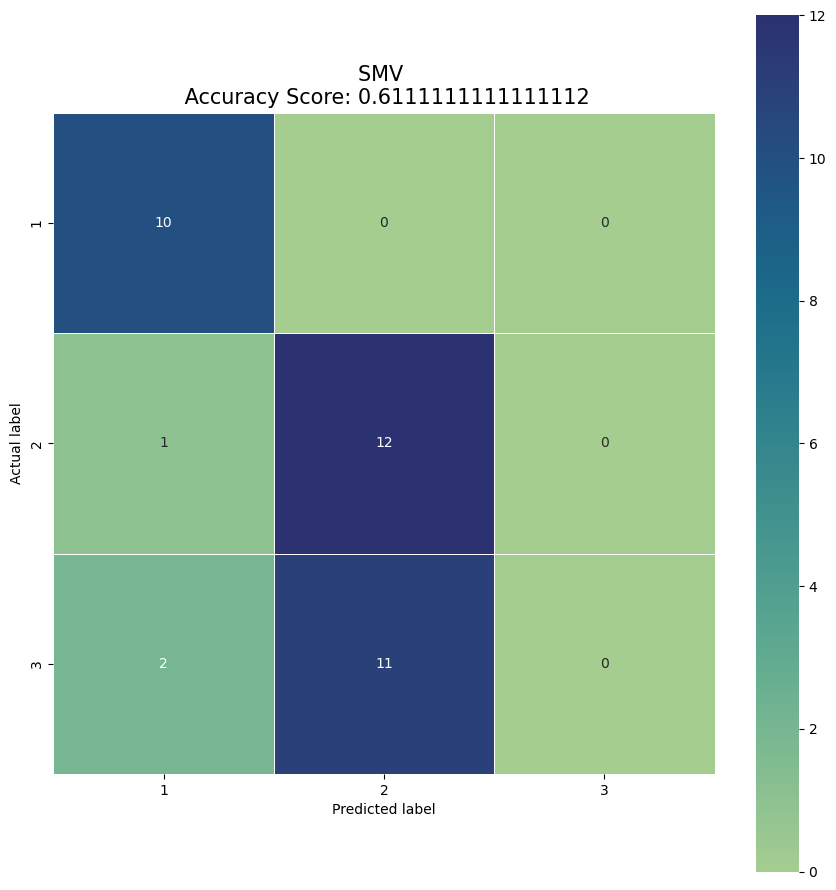

In [38]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm_clf, annot=True, linewidths=.5, square=True, cmap='crest');

plt.xticks(ticks=[i + 0.5 for i in range(cm_clf.shape[1])], labels=range(1, cm_clf.shape[1] + 1), ha='center')

plt.yticks(ticks=[i + 0.5 for i in range(cm_clf.shape[0])], labels=range(1, cm_clf.shape[0] + 1), va='center')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'SMV \n Accuracy Score: {0}'.format(score_clf)
plt.title(all_sample_title, size=15)

plt.tight_layout()

plt.show()

Ahora en SMV podemos ver donde estan los problemas, el modelo parece tener problemas al predecir 3, ya que nunca afirmo que fuera 3 ni siquiera para equivocarse. Parece confundirlo mucho con el 2.

Adicionalmente, predijo 3 veces 1 cuando era otro.

---
# Ejercicio 3
Entrena usando los diferentes parámetros que admiten para mejorar su predicción.

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
parametros_log = {
    'multi_class' : ['auto', 'ovr', 'multinomial'],
    'C' : [0.5, 1, 1.5],
    'solver' : ['lbfgs', 'saga']
}
parametros_SMV = {
    'kernel' : ['linear', 'rbf'],
    'gamma' : ['auto', 'scale'],
    'probability' : [True, False],
    'degree' : [1, 3, 5]
}

In [41]:
Modelos = [('Logistic', LogisticRegression(random_state=16), parametros_log), ('SMV', svm.SVC(), parametros_SMV)]

In [42]:
resultados_modelos = {}

for nombre, modelo, parametros in Modelos:
    print(f"Entrenando modelo: {nombre}")
    
    GS = GridSearchCV(estimator = modelo,
                      param_grid = parametros,
                      n_jobs = -1
                 )
    GS.fit(x_train, y_train)
    
    resultados_modelos[nombre] = {
        "mejores_parametros": GS.best_params_,
        "mejor_resultado": GS.best_score_,
        "mejor_modelo": GS.best_estimator_
    }
    print(" Mejores parametros:", GS.best_params_, "\n", "Mejor Resultado:", GS.best_score_, "\n", "Mejor Modelo: ", GS.best_estimator_)
    print("\n" + "="*40 + "\n")


Entrenando modelo: Logistic


D:\users\ciberintegra_14\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Mejores parametros: {'C': 0.5, 'multi_class': 'auto', 'solver': 'lbfgs'} 
 Mejor Resultado: 0.9438423645320198 
 Mejor Modelo:  LogisticRegression(C=0.5, random_state=16)


Entrenando modelo: SMV
 Mejores parametros: {'degree': 1, 'gamma': 'auto', 'kernel': 'linear', 'probability': True} 
 Mejor Resultado: 0.9507389162561577 
 Mejor Modelo:  SVC(degree=1, gamma='auto', kernel='linear', probability=True)




Estos son los resultados que GridSearch encontro, los mejores parametros, su resultado y su el modelo.

Text(0.5, 1.0, 'Comparación de Accurecy Score entre Modelos')

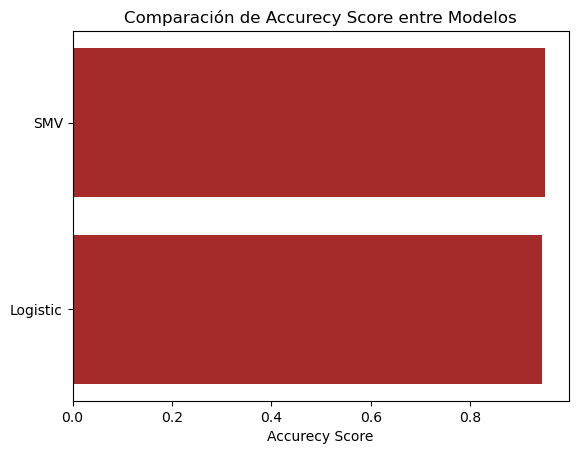

In [43]:
nombres_modelos = list(resultados_modelos.keys())

resultados_r2 = [resultados_modelos[nombre]["mejor_resultado"] for nombre in nombres_modelos]

plt.barh(nombres_modelos, resultados_r2, color='brown')
plt.xlabel('Accurecy Score')
plt.title('Comparación de Accurecy Score entre Modelos')

Aquí comparamos el accuracy ambos modelos y como vemos ahora estan más equilibrados y ambos estan bastante cerca del 1.

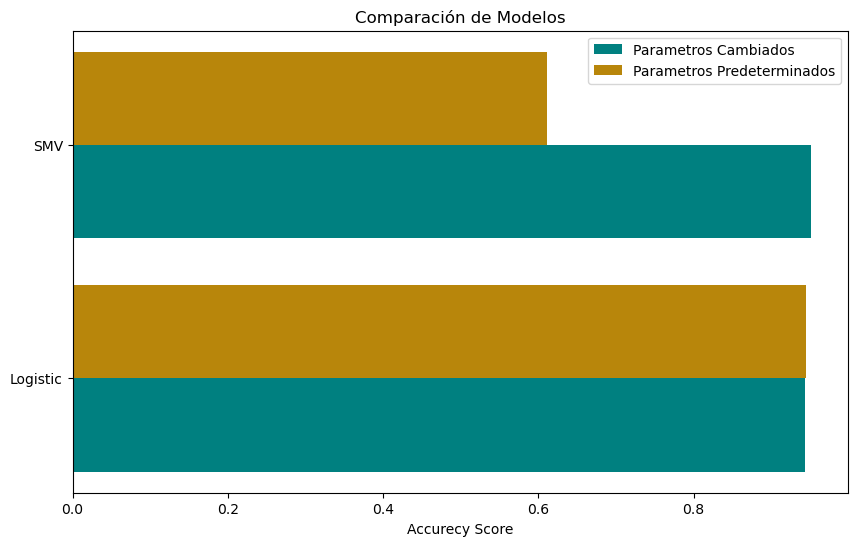

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.4

posiciones_r2 = np.arange(len(nombres_modelos))
posiciones_resultados = posiciones_r2 + bar_width

ax.barh(posiciones_r2, resultados_r2, height=bar_width, color='teal', label='Parametros Cambiados')

ax.barh(posiciones_resultados, [score_log, score_clf], height=bar_width, color='darkgoldenrod', label='Parametros Predeterminados')

ax.set_yticks(posiciones_r2 + bar_width / 2)
ax.set_yticklabels(nombres_modelos)
ax.set_xlabel('Accurecy Score')
ax.set_title('Comparación de Modelos')
ax.legend()

Ahora los comparamos con los valores predeterminados, vemos una clara mejoria en SMV, aunque una ligera desmejora con Logistic (esto es más claro comparando los números).

Ahora Logistic y SMV estan a la par.

---
# Ejercicio 4
Compara su rendimiento utilizando la aproximación traicionando/test o cross-validation.

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [46]:
Kfold = KFold(5)

In [47]:
pre_log_val = cross_val_score(LogisticRegression(random_state=16), x, y, cv = Kfold)
pre_SMV_val = cross_val_score(svm.SVC(), x, y, cv = Kfold)
mod_log_val = cross_val_score((LogisticRegression(C=0.5, random_state=16)), x, y, cv = Kfold)
mod_SMV_val = cross_val_score(svm.SVC(degree=1, gamma='auto', kernel='linear', probability=True), x, y, cv = Kfold)

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\users\ciberintegra_14\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [48]:
Validacion = [('Logistic (predeterminado)', pre_log_val), ('Logistic (GridSearch)', mod_log_val), ('SVM (predeterminado)', pre_SMV_val), ('SVM (GridSearch)', mod_SMV_val)]

In [49]:
for nombre, modelo in Validacion:
    print(f"{nombre}: \n")
    print(' Resultados: ', modelo,  '\n Media: ', modelo.mean(), '\n Deviración estandar: ', np.std(modelo), '\n\n', "-"*40, '\n')

Logistic (predeterminado): 

 Resultados:  [0.91666667 0.88888889 0.86111111 0.91428571 1.        ] 
 Media:  0.9161904761904761 
 Deviración estandar:  0.04649086852962581 

 ---------------------------------------- 

Logistic (GridSearch): 

 Resultados:  [0.91666667 0.88888889 0.83333333 0.94285714 1.        ] 
 Media:  0.9163492063492062 
 Deviración estandar:  0.05540023639837394 

 ---------------------------------------- 

SVM (predeterminado): 

 Resultados:  [0.83333333 0.75       0.5        0.62857143 0.        ] 
 Media:  0.5423809523809524 
 Deviración estandar:  0.2936531960433689 

 ---------------------------------------- 

SVM (GridSearch): 

 Resultados:  [0.91666667 0.88888889 0.88888889 0.94285714 0.91428571] 
 Media:  0.9103174603174603 
 Deviración estandar:  0.02016560312781874 

 ---------------------------------------- 



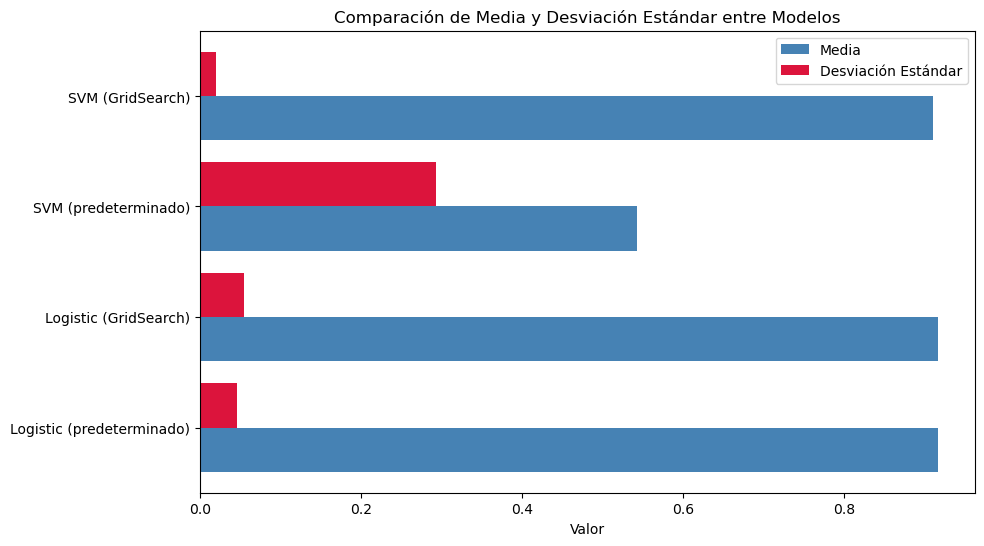

In [50]:
modelos, valores = zip(*Validacion)

fig, ax = plt.subplots(figsize=(10, 6))

posiciones_media = np.arange(len(modelos))
posiciones_desviacion = posiciones_media + bar_width

ax.barh(posiciones_media, [np.mean(valor) for valor in valores], height=bar_width, color='steelblue', label='Media')

ax.barh(posiciones_desviacion, [np.std(valor) for valor in valores], height=bar_width, color='crimson', label='Desviación Estándar')

ax.set_yticks(posiciones_desviacion - bar_width / 2)
ax.set_yticklabels(modelos)
ax.set_xlabel('Valor')
ax.set_title('Comparación de Media y Desviación Estándar entre Modelos')
ax.legend()

Podemos ver como ambos logistics y el SMV con parametros modificados estan muy a la par. Si nos vamos directamente a los valores podemos ver que el SMV modificado tiene la tercera mejor media por 0.006, que no es mucho, pero su desviación estandar es la más baja de todas, con 0.26 menor a la segunda más baja (si nos vamos a los valores).

Entonces, yo concluyo que SMV con parametros modificados es el mejor modelo, ya que es el que varia menos y da buenos resultados.

Adicionalmente, SVM predeterminado es el peor modelo por mucho, con la mayor derivación estandar y la peor media.

# Ejercicio 5
Aplica algún proceso de ingeniería para mejorar los resultados (normalización, estandarización, muestreo...)

In [51]:
from scipy.stats import shapiro

In [52]:
x_extra = x

In [53]:
Datos_numerico = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [54]:
for elemento in x_extra[Datos_numerico]:
    stat, p = shapiro(x_extra[elemento])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print(elemento, ':Probablemente Gaussiana')
    else:
        print(elemento, ':Probablemente no Gaussiana')

stat=0.982, p=0.020
Alcohol :Probablemente no Gaussiana
stat=0.889, p=0.000
Malic acid :Probablemente no Gaussiana
stat=0.984, p=0.039
Ash :Probablemente no Gaussiana
stat=0.990, p=0.264
Alcalinity of ash :Probablemente Gaussiana
stat=0.938, p=0.000
Magnesium :Probablemente no Gaussiana
stat=0.977, p=0.004
Total phenols :Probablemente no Gaussiana
stat=0.955, p=0.000
Flavanoids :Probablemente no Gaussiana
stat=0.963, p=0.000
Nonflavanoid phenols :Probablemente no Gaussiana
stat=0.981, p=0.014
Proanthocyanins :Probablemente no Gaussiana
stat=0.940, p=0.000
Color intensity :Probablemente no Gaussiana
stat=0.981, p=0.017
Hue :Probablemente no Gaussiana
stat=0.945, p=0.000
OD280/OD315 of diluted wines :Probablemente no Gaussiana
stat=0.931, p=0.000
Proline :Probablemente no Gaussiana


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
Standard = StandardScaler()

In [57]:
x_extra['Alcalinity of ash'] = Standard.fit_transform(x_extra[['Alcalinity of ash']])

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


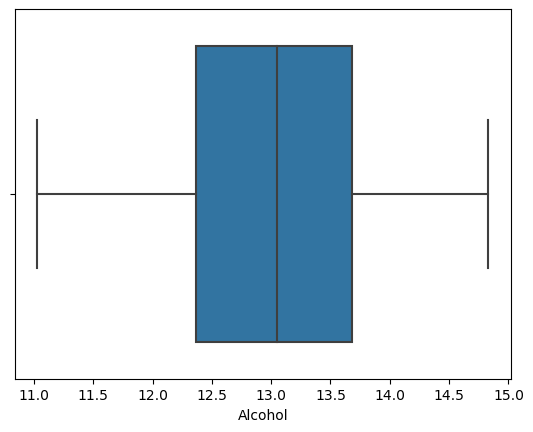

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


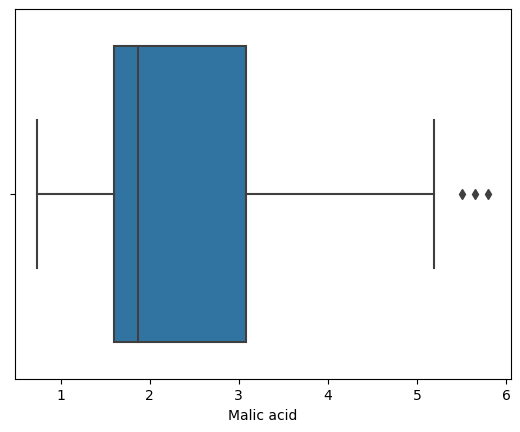

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


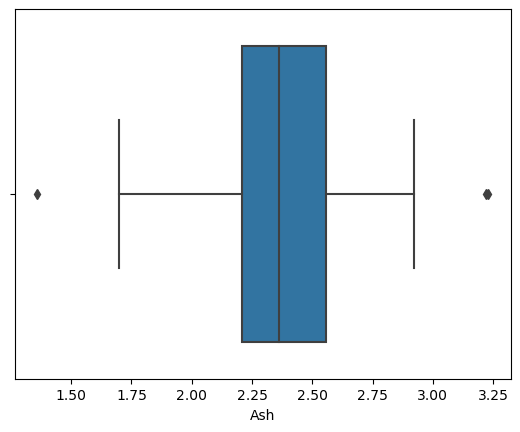

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


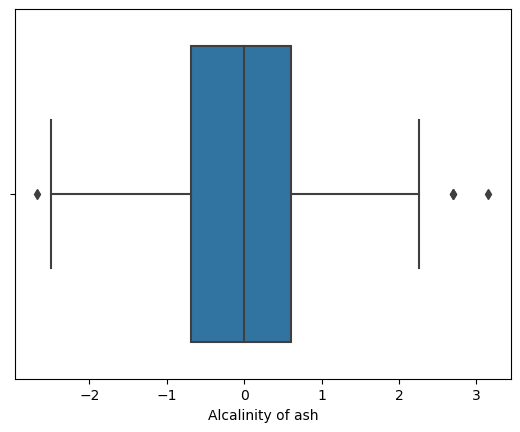

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


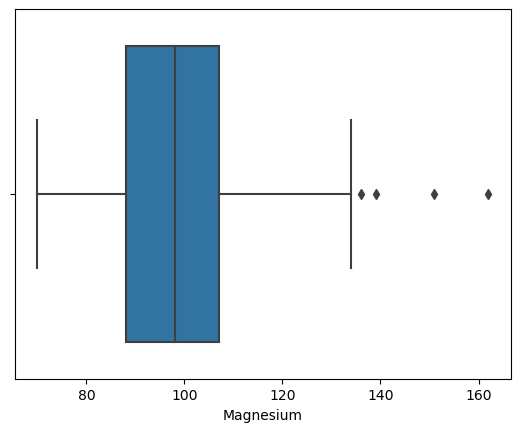

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


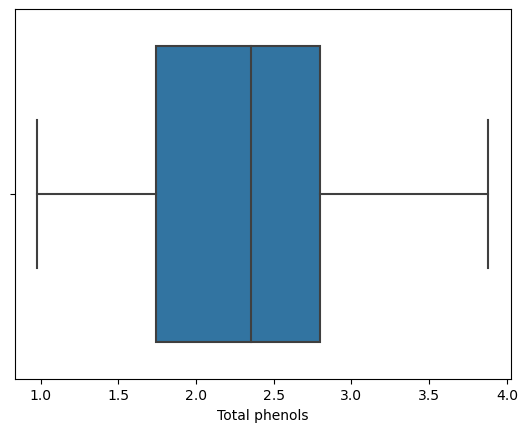

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


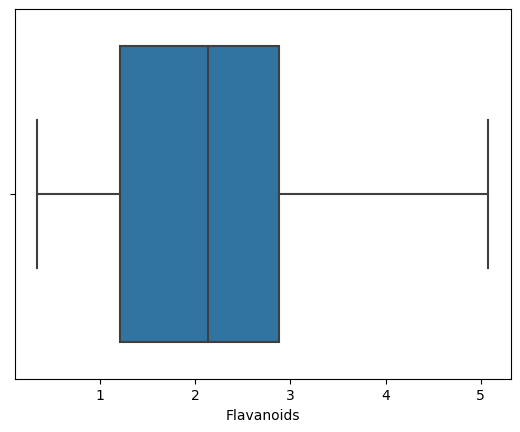

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


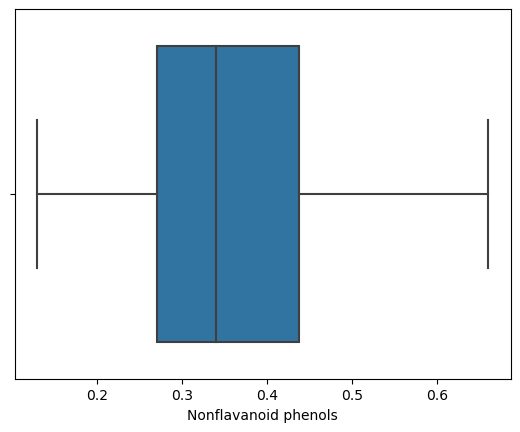

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


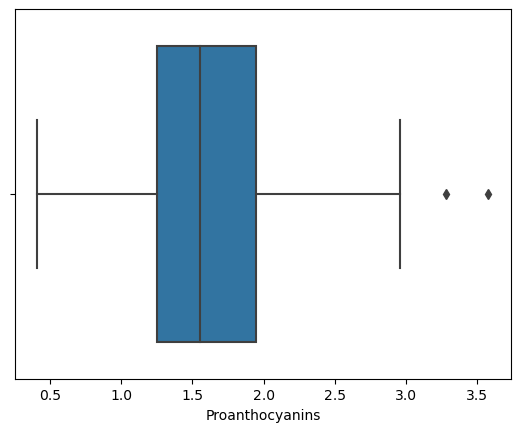

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


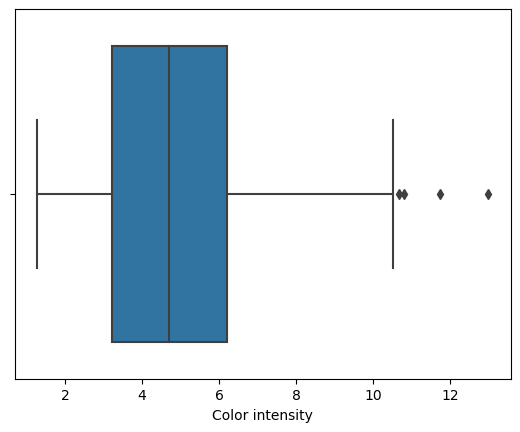

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


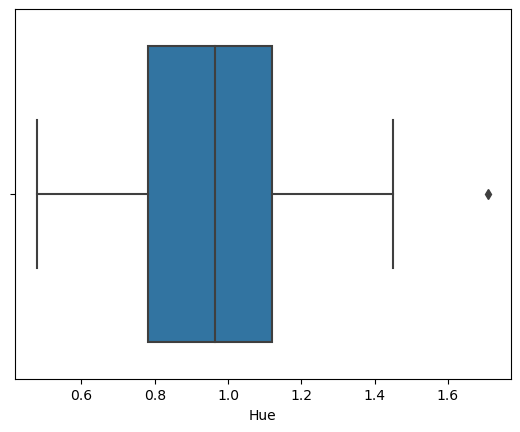

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


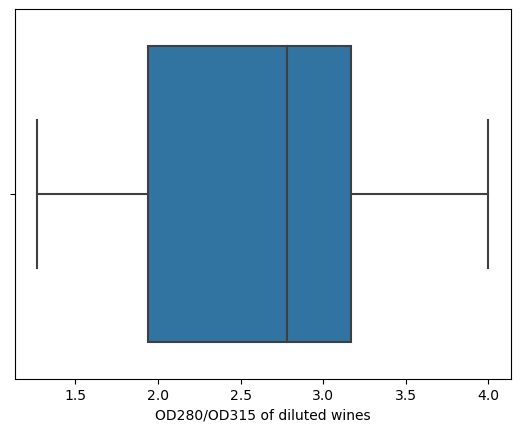

D:\users\ciberintegra_14\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


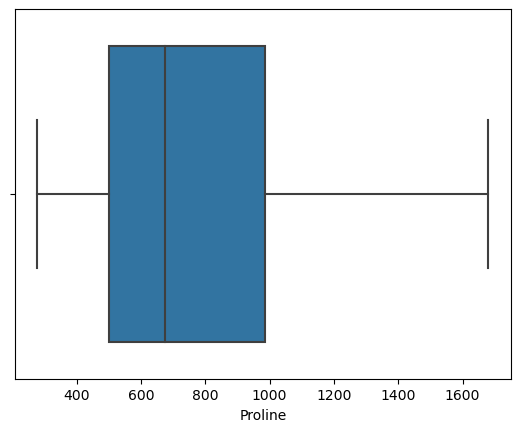

In [58]:
for elemento in x_extra[Datos_numerico]:
    sns.boxplot(x[elemento])
    plt.show()

In [59]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [60]:
Atipicos = ['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']
Tipicos = ['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proline']

In [61]:
mms = MinMaxScaler()
x_extra[Tipicos] = mms.fit_transform(x_extra[Tipicos])

In [62]:
rs = RobustScaler()
x_extra[Atipicos] = rs.fit_transform(x_extra[Atipicos])

Despues de hacer el preprocesado, estamos listos para hacer nuestras comparaciones

---

In [63]:
ex_train, ex_test, ey_train, ey_test = train_test_split(x_extra, y, test_size=0.20, random_state=4)

In [66]:
Modelo_5 = svm.SVC(degree=1, gamma='auto', kernel='linear', probability=True)

In [67]:
Modelo_5.fit(ex_train, ey_train)

SVC(degree=1, gamma='auto', kernel='linear', probability=True)

In [93]:
score_RMV = resultados_modelos['SMV']['mejor_resultado']
score_5 = accuracy_score(ey_test, pre_5)

In [95]:
print('El Accurecy en el SVM sin preprocesado es ', score_RMV)
print('El Accurecy en el SVM con preprocesado es ', score_5)

El Accurecy en el SVM sin preprocesado es  0.9507389162561577
El Accurecy en el SVM con preprocesado es  0.9722222222222222


Text(0.5, 1.0, 'Comparación de Accurecy Score entre Modelos de RMV')

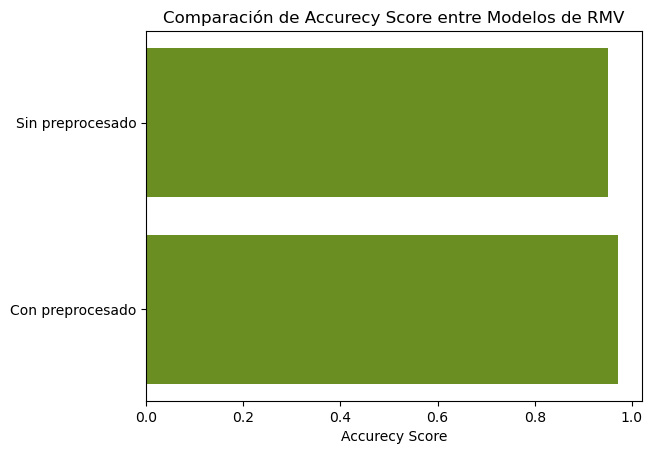

In [96]:
plt.barh(['Con preprocesado', 'Sin preprocesado'], [score_5, score_RMV], color='OliveDrab')
plt.xlabel('Accurecy Score')
plt.title('Comparación de Accurecy Score entre Modelos de RMV')

Vemos que con preprocesado, el modelo da mejores resultados, pues ha mejorado 0.02.

In [101]:
mod_SMV_val_5 = cross_val_score(svm.SVC(degree=1, gamma='auto', kernel='linear', probability=True), x_extra, y, cv = Kfold)

In [102]:
Validacion_ex = [('RMV con preprocesado', mod_SMV_val_5), ('RMV sin preprocesado', mod_SMV_val)]

In [103]:
for nombre, modelo in Validacion_ex:
    print(f"{nombre}: \n")
    print(' Resultados: ', modelo,  '\n Media: ', modelo.mean(), '\n Deviración estandar: ', np.std(modelo), '\n\n', "-"*40, '\n')

RMV con preprocesado: 

 Resultados:  [0.91666667 0.94444444 1.         0.85714286 0.97142857] 
 Media:  0.937936507936508 
 Deviración estandar:  0.04898156542593045 

 ---------------------------------------- 

RMV sin preprocesado: 

 Resultados:  [0.91666667 0.88888889 0.88888889 0.94285714 0.91428571] 
 Media:  0.9103174603174603 
 Deviración estandar:  0.02016560312781874 

 ---------------------------------------- 



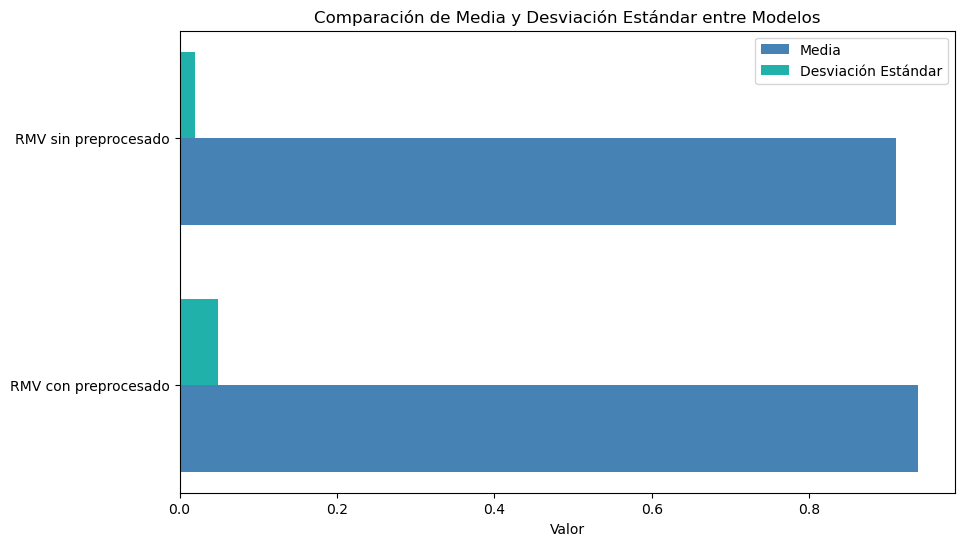

In [104]:
modelos, valores = zip(*Validacion_ex)

fig, ax = plt.subplots(figsize=(10, 6))

posiciones_media = np.arange(len(modelos))
posiciones_desviacion = posiciones_media + bar_width

ax.barh(posiciones_media, [np.mean(valor) for valor in valores], height=bar_width, color='SteelBlue', label='Media')

ax.barh(posiciones_desviacion, [np.std(valor) for valor in valores], height=bar_width, color='LightSeaGreen', label='Desviación Estándar')

ax.set_yticks(posiciones_desviacion - bar_width / 2)
ax.set_yticklabels(modelos)
ax.set_xlabel('Valor')
ax.set_title('Comparación de Media y Desviación Estándar entre Modelos')
ax.legend()

Haciendo cross-validation, podemos confirmar que con preprocesado da mejores resultados de media, pero la derivación estándar es tambien más grande.

Sin embargo, en esta ocación yo diria que el modelo con preprocesado es mejor, ya que aunque en la tabla parece que la derivación es muy grande, realmente es de solo 0.02, la misma de la media. Yo escogeria la versión con preprocesado porque en cuestiones generales da mejores resultados y solo es un poco menos coerente que la versión sin preprocesado.